In [1]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [31]:
# Import the training set
dataset_train = pd.read_excel('E(蘋概股).xlsx')  # 讀取訓練集
dataset_test = pd.read_excel('E(蘋概股)_測試.xlsx')
data_all = pd.concat((dataset_train,dataset_test),join='inner', axis = 0)
data_all=data_all.fillna(method="ffill")
#dataset_train=dataset_train.dropna(axis=1)
training_set = data_all.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]#.values  # 取欄位值
training_set1= data_all.iloc[:, 1:2].values

In [15]:
training_set

,- MARKET VALUE,- PRICE INDEX,- ASK PRICE,- BID PRICE,- PRICE HIGH,- PRICE LOW,- OPENING PRICE,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW
0,53857.52,607.6,81.0,80.9,59.36,57.25,57.61,79.0,81.0,81.0,80.9,81.4,78.5
1,53525.05,603.8,80.6,80.5,59.29,58.42,59.07,81.0,80.5,80.6,80.5,81.3,80.1
2,53525.05,603.8,80.6,80.5,59.29,58.42,59.07,81.0,80.5,80.6,80.5,81.3,80.1
3,53857.52,607.6,81.0,80.9,59.73,58.78,59.22,81.2,81.0,81.0,80.9,81.9,80.6
4,55054.34,621.1,82.9,82.8,60.89,59.36,59.80,82.0,82.8,82.9,82.8,83.5,81.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,220331.80,2145.2,286.5,286.0,274.72,265.70,273.29,288.0,286.0,286.5,286.0,289.5,280.0
481,234969.30,2287.8,305.0,304.5,292.75,275.19,275.19,290.0,305.0,305.0,304.5,308.5,290.0
482,241517.60,2351.5,313.5,313.0,303.66,296.54,297.02,313.0,313.5,313.5,313.0,320.0,312.5
483,241132.40,2347.8,313.0,312.0,297.97,292.75,294.17,310.0,313.0,313.0,312.0,314.0,308.5


In [16]:
real_stock_price =data_all.iloc[2100:2232,1].values

In [17]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [18]:
X_train = []   
y_train = []   
for i in range(7, 2100):  # 2100 是訓練集總數
    X_train.append(training_set_scaled[i-7:i,:])
    y_train.append(training_set_scaled1[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1))
# Import the Keras libraries and packages

# Initialising the RNN
regressor = Sequential()

In [19]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2093/2093 [==============================] - 11s 5ms/step - loss: 0.0209
Epoch 2/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0035
Epoch 3/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0043
Epoch 4/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0035
Epoch 5/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0033
Epoch 6/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0031
Epoch 7/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0026
Epoch 8/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0031
Epoch 9/100
2093/2093 [==============================] - 9s 5ms/step - loss: 0.0029
Epoch 10/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0029
Epoch 11/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0029
Epoch 12/100
2093/2093 [==============================] - 9s 4ms/step 

2093/2093 [==============================] - 9s 4ms/step - loss: 9.3098e-04
Epoch 97/100
2093/2093 [==============================] - 9s 4ms/step - loss: 9.8275e-04
Epoch 98/100
2093/2093 [==============================] - 9s 4ms/step - loss: 8.5296e-04
Epoch 99/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0010
Epoch 100/100
2093/2093 [==============================] - 9s 4ms/step - loss: 9.9719e-04


In [20]:
X_test=[]
for i in range(2101, 2232):  # 1747 是訓練集總數
    X_test.append(training_set_scaled[i-7:i,0:])

In [21]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1))

In [125]:
predicted_stock_price = regressor.predict(X_test)

In [126]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)  # to get the original scale

Text(0, 0.5, 'E Price')

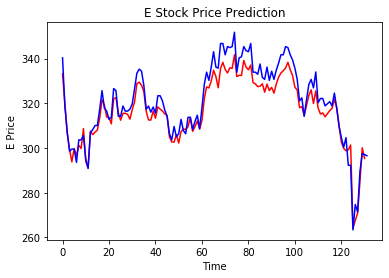

In [127]:
plt.plot(predicted_stock_price,color='red',label= 'predicted_stock_price')
plt.plot(real_stock_price,color = 'blue',label='real_stock_price')
plt.title('E Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('E Price')

In [128]:
data_50 = pd.read_excel('E(蘋概股)_50 天_ques.xlsx') 

In [129]:
data_50 = data_50.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]

In [130]:
data_50plus = pd.concat((dataset_test,data_50),join='inner', axis = 0)
data_50plus=data_50plus.fillna(method="ffill")

In [131]:
final_scaled=sc.transform(data_50plus)

In [132]:
X_final = []
for i in range(485, 535):  # 1747 是訓練集總數
    X_final.append(final_scaled[i-7:i,0:])

In [133]:
X_final = np.array(X_final)
X_final = np.reshape(X_final, (X_final.shape[0], X_final.shape[1]*X_final.shape[2], 1))

In [134]:
predicted_stock_price = regressor.predict(X_final)

In [135]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)

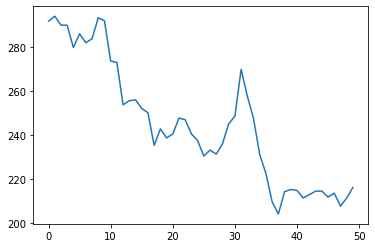

In [136]:
plt.plot(predicted_stock_price)

In [145]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)

In [146]:
predicted_stock_price.to_excel('t.xlsx')

In [152]:
hold=dataset_test.iloc[484,1:2]

In [153]:
hold

Unnamed: 1    296.54
Name: 484, dtype: object

In [154]:
hold=pd.DataFrame(hold)